
Logistic Regression Results:
AUC Score: 0.994
Confusion Matrix:
[[46  1]
 [ 5 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114


Decision Tree Results:
AUC Score: 0.916
Confusion Matrix:
[[44  3]
 [ 7 60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114


SVM Results:
AUC Score: 0.984
Confusion Matrix:
[[40  7]
 [ 1 66]]
Classification Report:
              precision    recall  f1-score   s

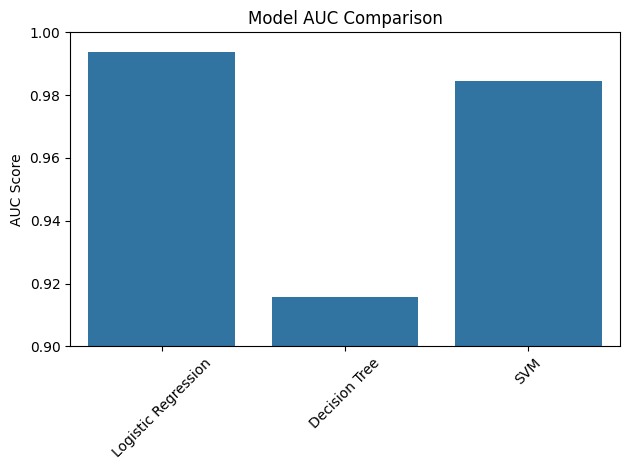

In [6]:
# objective4_model_comparison.py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Results:")
    print("AUC Score:", round(auc, 3))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Visual Comparison (AUC Scores)
auc_scores = {name: roc_auc_score(y_test, m.predict_proba(X_test)[:, 1]) for name, m in models.items()}
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()))
plt.title("Model AUC Comparison")
plt.ylabel("AUC Score")
plt.ylim(0.90, 1.00)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
